Upload your Pfam binary matrix file:


Saving pfam_filtered.xlsx to pfam_filtered (1).xlsx
Upload your morphology file:


Saving morph_filtered.xlsx to morph_filtered (1).xlsx


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

      coccus       0.50      0.25      0.33         4
 filamentous       0.00      0.00      0.00         1
       other       0.00      0.00      0.00         3
         rod       0.86      1.00      0.93        38

    accuracy                           0.85        46
   macro avg       0.34      0.31      0.32        46
weighted avg       0.76      0.85      0.79        46



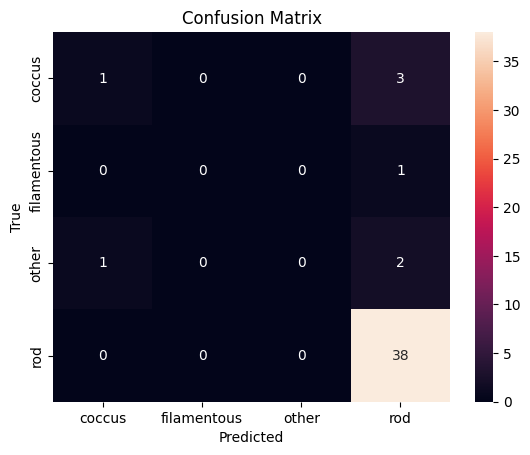

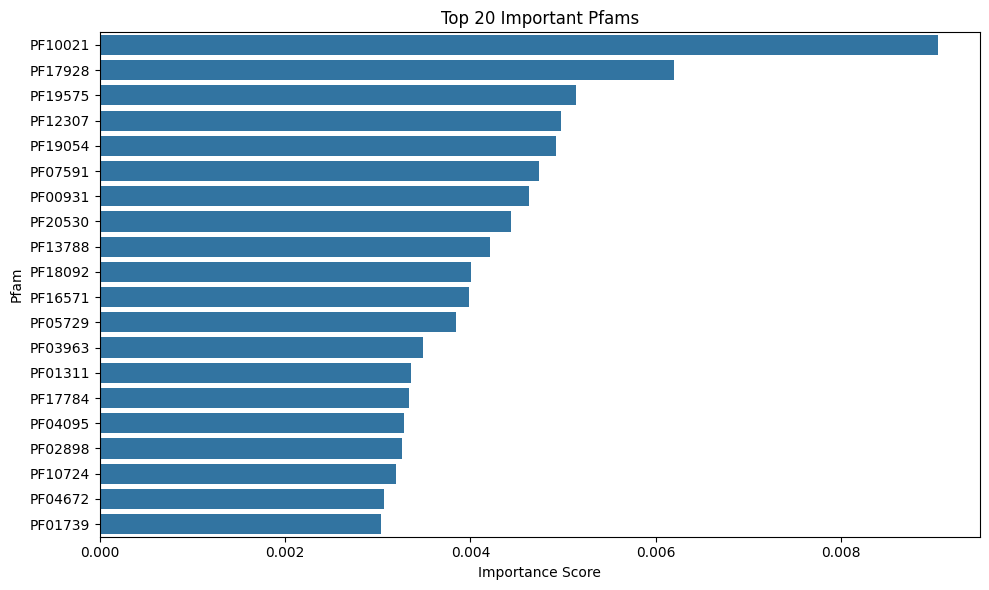

In [2]:
!pip install pandas scikit-learn openpyxl seaborn matplotlib

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
print("Pfam binary matrix:")
pfam_file = files.upload()

print("Morphology file:")
morph_file = files.upload()

pfam_df = pd.read_excel(list(pfam_file.keys())[0]) if list(pfam_file.keys())[0].endswith('.xlsx') else pd.read_csv(list(pfam_file.keys())[0])
morph_df = pd.read_excel(list(morph_file.keys())[0]) if list(morph_file.keys())[0].endswith('.xlsx') else pd.read_csv(list(morph_file.keys())[0])

common_col = list(set(pfam_df.columns) & set(morph_df.columns))
if not common_col:
    raise ValueError("Check your files")
key_col = common_col[0]

morph_df = morph_df.dropna(subset=['shape_std'])

merged_df = pd.merge(pfam_df, morph_df[[key_col, 'shape_std']], on=key_col)

X = merged_df.drop(columns=[key_col, 'shape_std'])
y = merged_df['shape_std']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 20 Important Pfams")
plt.xlabel("Importance Score")
plt.ylabel("Pfam")
plt.tight_layout()
plt.show()